### 라이브러리 불러오기

In [ ]:
# Factor Analyzer 설치
! pip install factor_analyzer

In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 공간적 자기상관분석 라이브러리 설치
!pip install splot
!pip install pysal
!pip install esda

In [ ]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.filterwarnings(action='ignore')

## 코드

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
import pandas as pd
data_all = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/방학 프로젝트/데이터/최종_최종_병합_데이터.csv')

In [ ]:
data = data_all.drop(['이름'],axis = 1)

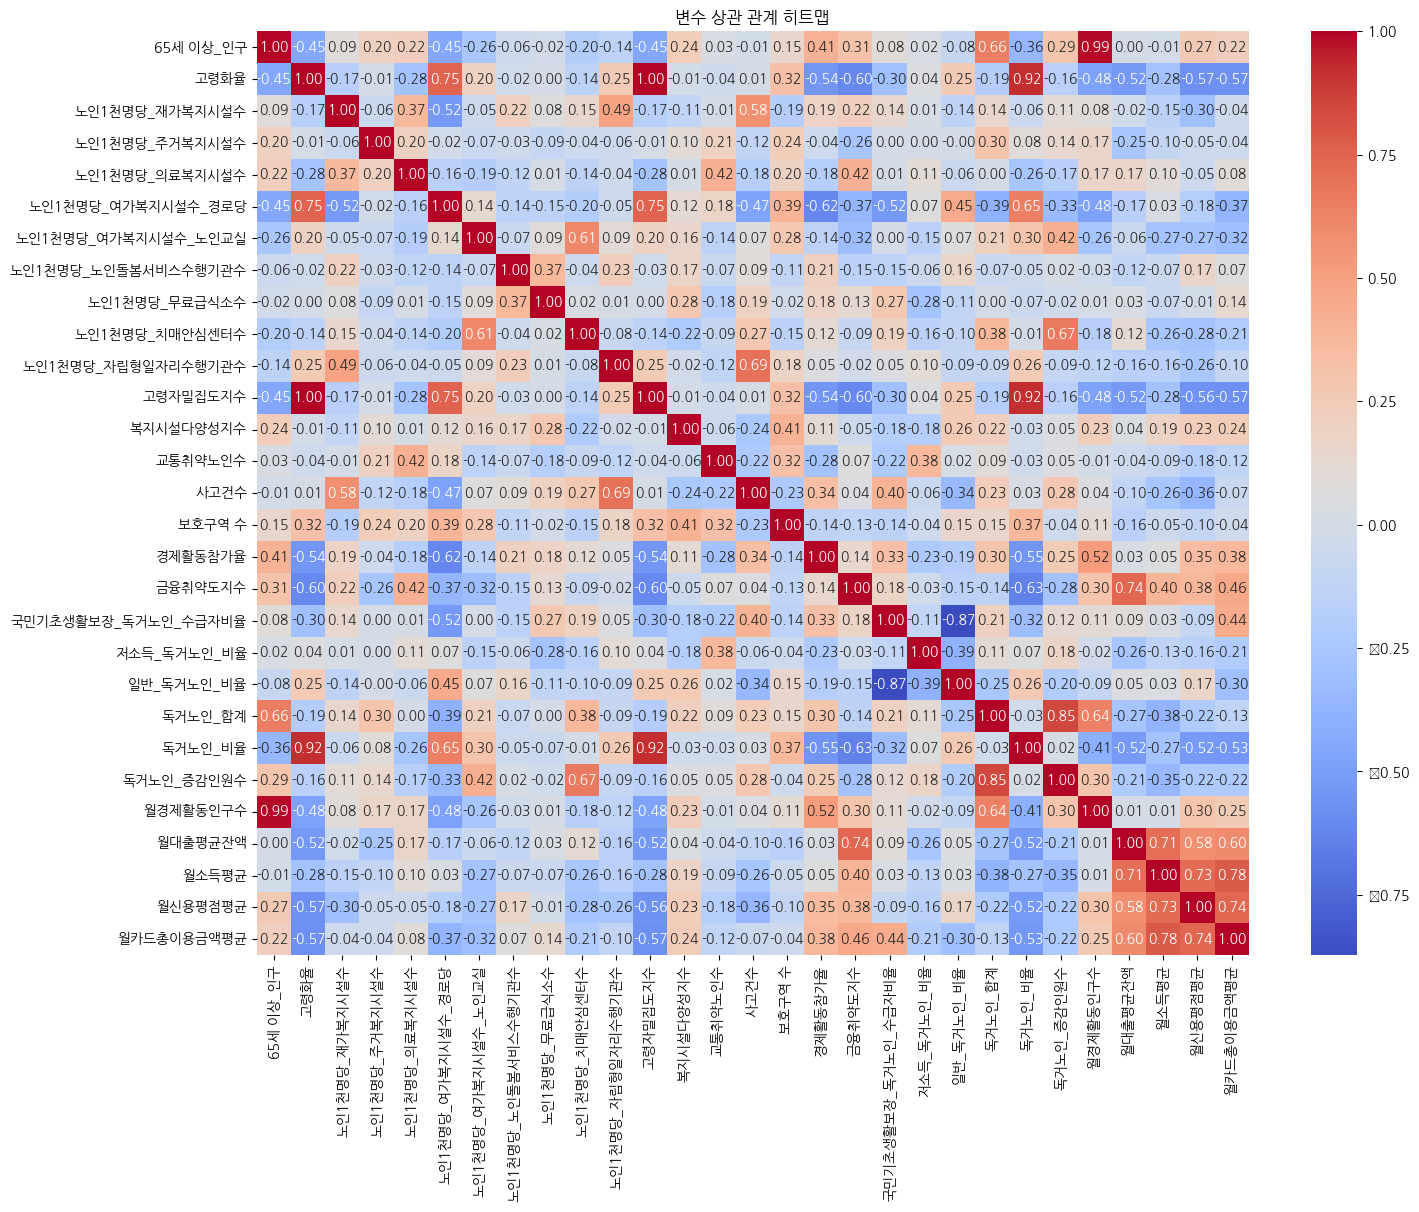

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 상관 관계 히트맵')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
# X의 데이터 타입을 float으로 변환
data = data.astype(float)

# 상수항 추가
data_const = add_constant(data)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = data_const.columns
vif_data['VIF'] = [variance_inflation_factor(data_const.values, i) for i in range(data_const.shape[1])]

# VIF 계산 후 무한값을 NaN으로 대체
vif_data['VIF'] = vif_data['VIF'].replace([np.inf, -np.inf], np.nan)

# VIF 값이 10 이상인 변수들만 출력
high_vif = vif_data[vif_data['VIF'] >= 10]
high_vif

,Variable,VIF
1,65세 이상_인구,2627.649347
2,고령화율,658465.952558
3,노인1천명당_재가복지시설수,50.934493
5,노인1천명당_의료복지시설수,11.661037
6,노인1천명당_여가복지시설수_경로당,32.075335
10,노인1천명당_치매안심센터수,33.361344
11,노인1천명당_자립형일자리수행기관수,30.228094
12,고령자밀집도지수,653850.088336
13,복지시설다양성지수,18.854091
14,교통취약노인수,11.294066


* 히트맵 및 VIF 기준으로 변수 drop

In [ ]:
data = data.drop(['경제활동참가율', '사고건수', '보호구역 수', '일반_독거노인_비율', '65세 이상_인구', '독거노인_증감인원수', '저소득_독거노인_비율','복지시설다양성지수',
                  '노인1천명당_의료복지시설수','노인1천명당_여가복지시설수_경로당','월경제활동인구수','교통취약노인수','독거노인_합계','노인1천명당_주거복지시설수','노인1천명당_노인돌봄서비스수행기관수'], axis=1)

In [ ]:
# 최종 data 변수들
data.columns

Index(['고령화율', '노인1천명당_재가복지시설수', '노인1천명당_여가복지시설수_노인교실', '노인1천명당_무료급식소수',
       '노인1천명당_치매안심센터수', '노인1천명당_자립형일자리수행기관수', '고령자밀집도지수', '금융취약도지수',
       '국민기초생활보장_독거노인_수급자비율', '독거노인_비율', '월대출평균잔액', '월소득평균', '월신용평점평균',
       '월카드총이용금액평균'],
      dtype='object')

In [ ]:
# 데이터 shape
data.shape

(31, 14)

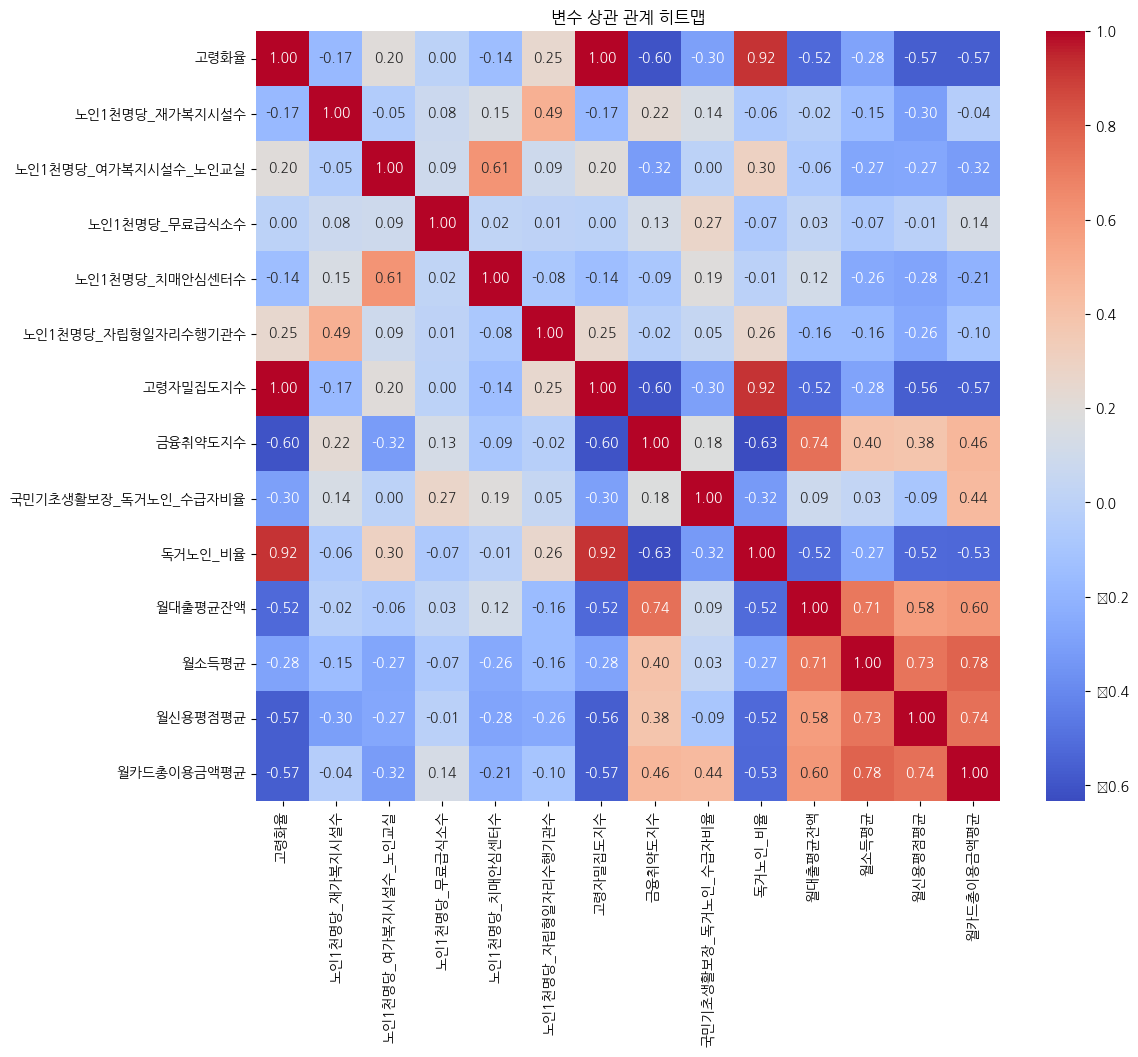

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 상관 관계 히트맵')
plt.show()

In [ ]:
# 데이터 정규화, 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd

# 원본 복사
processed = data.copy()

# === ① 로그 변환 대상 (금융 금액류: 금액 범위 큼) ===
log_vars = ['월대출평균잔액', '월소득평균', '월카드총이용금액평균']
for col in log_vars:
    processed[col] = processed[col].apply(lambda x: np.log1p(x))  # log(1 + x)

# === ② 스케일링 ===

# (1) StandardScaler 대상: 비율/지수류
standard_scale_vars = [
    '고령화율', '고령자밀집도지수', '금융취약도지수',
    '국민기초생활보장_독거노인_수급자비율', '독거노인_비율',
    '월신용평점평균'  # log 처리 포함
]
scaler_std = StandardScaler()
processed[standard_scale_vars] = scaler_std.fit_transform(processed[standard_scale_vars])

# (2) MinMaxScaler 대상: 시설 수 / 드물게 등장하는 정수형 변수
minmax_scale_vars = [
    '노인1천명당_재가복지시설수',
    '노인1천명당_여가복지시설수_노인교실',
    '노인1천명당_무료급식소수',
    '노인1천명당_치매안심센터수',
    '노인1천명당_자립형일자리수행기관수'
]
scaler_mm = MinMaxScaler()
processed[minmax_scale_vars] = scaler_mm.fit_transform(processed[minmax_scale_vars])

# (3) log + StandardScaler 대상: 금융 금액류
log_std_vars = ['월대출평균잔액', '월소득평균', '월카드총이용금액평균']
scaler_log_std = StandardScaler()
processed[log_std_vars] = scaler_log_std.fit_transform(processed[log_std_vars])

# === ③ 반전 처리 (고위험도에 음의 영향인 변수) ===
reverse_vars = [
    '노인1천명당_재가복지시설수',
    '노인1천명당_여가복지시설수_노인교실',
    '노인1천명당_무료급식소수',
    '노인1천명당_치매안심센터수',
    '노인1천명당_자립형일자리수행기관수',
    '월소득평균',
    '월신용평점평균',
    '월카드총이용금액평균'
]

# 1.0 - 값으로 뒤집기 (스케일링된 값 기준)
for col in reverse_vars:
    processed[col] = -processed[col]  # 또는 1.0 - processed[col] 도 가능

# 결과 확인
processed.head()

,고령화율,노인1천명당_재가복지시설수,노인1천명당_여가복지시설수_노인교실,노인1천명당_무료급식소수,노인1천명당_치매안심센터수,노인1천명당_자립형일자리수행기관수,고령자밀집도지수,금융취약도지수,국민기초생활보장_독거노인_수급자비율,독거노인_비율,월대출평균잔액,월소득평균,월신용평점평균,월카드총이용금액평균
0,-0.040131,-0.329407,-0.00000,-0.0,-0.0,-0.000000,-0.040957,-1.417183,0.009304,0.460518,-1.564256,0.530867,0.294695,0.149838
1,-0.229103,-0.432841,-0.00000,-0.0,-0.0,-0.000000,-0.232919,1.403501,-1.090746,-0.323984,1.717757,-0.846513,0.411817,0.357939
2,1.605502,-0.256889,-0.70964,-0.0,-0.0,-0.470964,1.606989,-0.880066,-0.900049,1.735299,-0.661449,0.254444,0.376681,0.704844
3,1.361413,-0.269570,-0.00000,-0.0,-0.0,-0.000000,1.365113,-0.660357,-0.730917,1.328512,-0.489390,-0.397989,-0.080097,0.236485
4,1.810222,-0.345327,-0.00000,-0.0,-0.0,-0.000000,1.807702,-0.838773,-1.229703,1.785651,0.335870,-0.471891,0.575789,0.821630


In [ ]:
# Bartlett 검정
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(processed)
chi_square_value, p_value

(np.float64(601.9915592641623), np.float64(2.4792585869915832e-76))

p-value가 거의 0에 가까움. 검정이 통계적으로 유의하다는 것을 의미하며, 이는 변수들 간 상관관계 존재 → 요인분석을 진행할 수 있음을 의미.

In [ ]:
# KMO(Kaiser-Meyer-Olkin) 검사
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(processed)
kmo_model

np.float64(0.6077521794710167)

데이터의 전체 KMO 값은 0.6077으로 이는 요인분석을 진행할 수 있음을 의미.

### 인자수 결정하기(Identify the Number of Factors)
* 요인 수를 선택할 때는 Kaiser 기준(Kaiser criterion)과 스크리 플롯(Scree plot)을 사용할 수 있음. 이 두 방법 모두 고유값(eigenvalues)을 기반으로 함.

In [ ]:
from factor_analyzer import FactorAnalyzer

# Factor Analyzer 객체 생성
fa = FactorAnalyzer()

# 데이터프레임에 대해 요인분석 적합
fa.fit(data)

# 고유값(eigenvalues) 확인
ev, v = fa.get_eigenvalues() # eigenvalues

# 고유값 출력
ev

array([5.41086123e+00, 2.14326057e+00, 1.58847467e+00, 1.26795317e+00,
       1.17104220e+00, 8.25218783e-01, 6.23936945e-01, 4.56479263e-01,
       2.35947113e-01, 1.28096357e-01, 5.94583704e-02, 5.42851991e-02,
       3.49845406e-02, 1.58001567e-06])

* Kaiser 기준:
</br>이 규칙은 고유값이 1보다 큰 요인들을 유지할 것을 제안함.

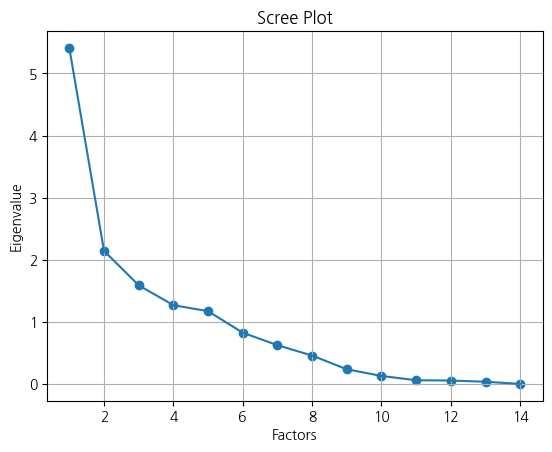

In [ ]:
# Scree plot 생성
import matplotlib.pyplot as plt
plt.scatter(range(1, data.shape[1]+1), ev)
plt.plot(range(1, data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
import numpy as np
np.sum(ev>1)

np.int64(5)

Scree plot 방법은 각 요인과 그 고유값(eigenvalues)을 꺾은선 그래프로 나타냄. 1보다 큰 고유값의 개수를 요인 수로 간주함.

### Factor Analysis 수행
여기서는 요인 적재 행렬(factor loading matrix)에 대해 회전(rotation)을 수행. 회전의 목적은 각 변수들이 특정 요인(factor)에 더 뚜렷하게 연결되도록(극단적인 적재값을 갖도록) 만들어, 각 요인의 해석력을 높이고 명확한 의미를 부여하는 데 있음.
</br>From a mathematical point of view, there is no difference between a rotated and unrotated matrix. The fitted model is the same, the uniquenesses are the same, and the proportion of variance explained is the same.

In [ ]:
fa = FactorAnalyzer(n_factors = 5, rotation ='varimax',method = 'ml').fit(processed)

**공통성(Communality)**
</br>공통성(Communality)이란, 각 변수의 전체 분산 중에서 요인 분석을 통해 설명되는 비율을 의미.
즉, 각 변수의 분산을 요인(factor)들이 얼마나 잘 설명하는지를 나타내는 지표.
  * 공통성 해석 방법 (How to Interpret Communalities)
    * 범위: 공통성 값은 0에서 1 사이.
    - 0: 해당 변수의 분산을 요인들이 전혀 설명하지 못함
    - 1: 해당 변수의 분산이 전적으로 요인들에 의해 설명됨

In [ ]:
print("\nCommunalities (PAF):")

# Get communalities
communalities_df = pd.DataFrame(fa.get_communalities(), columns=['Communality'], index=data.columns)

# 높은 공통성을 갖는 변수에 highlight하는 함수
def highlight_high_communalities(val):
    if val > 0.6:
        return 'background-color: lightgreen'
    else:
        return ''

# 함수 적용
styled_communalities = communalities_df.style.applymap(highlight_high_communalities)

styled_communalities


Communalities (PAF):


,Communality
고령화율,0.997511
노인1천명당_재가복지시설수,0.307180
노인1천명당_여가복지시설수_노인교실,0.533552
노인1천명당_무료급식소수,0.091009
노인1천명당_치매안심센터수,0.913768
노인1천명당_자립형일자리수행기관수,0.194018
고령자밀집도지수,0.997503
금융취약도지수,0.875800
국민기초생활보장_독거노인_수급자비율,0.672157
독거노인_비율,0.879563


**요인 적재량**
</br>요인 적재량은 하나의 변수와 특정 요인(factor) 사이의 상관관계 또는 관련성의 정도를 의미. 즉, 어떤 변수가 특정 요인과 얼마나 밀접하게 연결되어 있는지를 보여주는 값.



In [ ]:
# 요인 적재량 출력
print("Factor loadings (PAF)")

# 요인적재 행렬 생성
lmatrix = pd.DataFrame(
    fa.loadings_,
    index=list(processed.columns),
    columns=['인자 1', '인자 2', '인자 3','인자 4', '인자 5']
)

# 각 변수별 최대 절대 적재값 위치 찾기
max_loading_mask = lmatrix.abs().eq(lmatrix.abs().max(axis=1), axis=0)

# 스타일링 함수: 최대 loading 셀에만 색칠
def highlight_max(df):
    # CSS 스타일 DataFrame 생성
    style_df = pd.DataFrame('', index=df.index, columns=df.columns)
    style_df[max_loading_mask] = 'background-color: lightblue'
    return style_df

# 스타일 적용
styled_lmatrix = lmatrix.style.apply(highlight_max, axis=None)

styled_lmatrix

Factor loadings (PAF)


,인자 1,인자 2,인자 3,인자 4,인자 5
고령화율,0.964623,0.185389,0.013974,-0.170918,0.056892
노인1천명당_재가복지시설수,0.191205,-0.298443,0.010465,-0.086647,0.417055
노인1천명당_여가복지시설수_노인교실,-0.176734,-0.110081,0.693068,0.072613,-0.067707
노인1천명당_무료급식소수,-0.032541,0.033084,-0.003358,-0.059583,0.292051
노인1천명당_치매안심센터수,0.154554,-0.165405,0.921554,-0.039537,0.108150
노인1천명당_자립형일자리수행기관수,-0.256762,-0.116734,-0.097005,-0.005938,0.324067
고령자밀집도지수,0.964683,0.185168,0.014407,-0.170847,0.056626
금융취약도지수,-0.458006,-0.138814,0.204465,0.753130,-0.194293
국민기초생활보장_독거노인_수급자비율,-0.264532,-0.084559,-0.101425,-0.089108,-0.759475
독거노인_비율,0.882705,0.129143,-0.125486,-0.252296,0.065706


In [ ]:
# 각 변수별 최대 loading 절대값이 있는 Factor 구하기
assigned_factors = lmatrix.abs().idxmax(axis=1) # 요인 적재 행렬

# 변수, 할당된 Factor, loading 값으로 DataFrame 만들기
assigned_df = pd.DataFrame({
    'Variable': lmatrix.index,
    'Assigned Factor': assigned_factors,
    'Loading': [lmatrix.loc[var, factor] for var, factor in zip(lmatrix.index, assigned_factors)]
})

# Assigned Factor별 정렬
assigned_df = assigned_df.sort_values('Assigned Factor').reset_index(drop=True)

# 보기 좋게 출력
assigned_df[['Assigned Factor','Variable','Loading']]

,Assigned Factor,Variable,Loading
0,인자 1,고령화율,0.964623
1,인자 1,고령자밀집도지수,0.964683
2,인자 1,독거노인_비율,0.882705
3,인자 2,월소득평균,0.857301
4,인자 2,월신용평점평균,0.766456
5,인자 2,월카드총이용금액평균,0.801661
6,인자 3,노인1천명당_여가복지시설수_노인교실,0.693068
7,인자 3,노인1천명당_치매안심센터수,0.921554
8,인자 4,금융취약도지수,0.753130
9,인자 4,월대출평균잔액,0.780338


In [ ]:
# Get variance of each factors
fa.get_factor_variance()

(array([3.56813692, 2.49961641, 1.55575692, 1.44973957, 1.16898838]),
 array([0.25486692, 0.17854403, 0.11112549, 0.10355283, 0.08349917]),
 array([0.25486692, 0.43341095, 0.54453645, 0.64808927, 0.73158844]))

총 72%의 누적 분산이 3개의 요인에 의해 설명됨

### 공통성(Communality)과 고유성(Uniqueness)
요인분석(Factor Analysis)은 여러 변수들이 공유하는 공통된 패턴을 찾아내기 위해 수행됨. 이때 각 변수의 변동성(분산)은 두 부분으로 나눌 수 있음:

* 공통성 (Communality): 변수의 변동성 중 요인(factor)들로 설명되는 부분.
→ 즉, 변수와 다른 변수들 사이에 공통된 요인이 어느 정도 영향을 미치는지를 나타냄.

* 고유성 (Uniqueness): 변수의 변동성 중 요인들로 설명되지 않는 나머지 부분.
→ 해당 변수만의 독립적인 특성이나 오차로 볼 수 있음.

In [ ]:
# 공통성(communality)
fa.get_communalities()

array([0.99751115, 0.30717964, 0.53355248, 0.09100852, 0.91376804,
       0.19401835, 0.99750253, 0.87580048, 0.67215653, 0.87956284,
       0.9950246 , 0.8689557 , 0.92113329, 0.99506406])

In [ ]:
# 고유성(Uniqueness)
fa.get_uniquenesses()

array([0.00248885, 0.69282036, 0.46644752, 0.90899148, 0.08623196,
       0.80598165, 0.00249747, 0.12419952, 0.32784347, 0.12043716,
       0.0049754 , 0.1310443 , 0.07886671, 0.00493594])

**가중치 계산 방법**
공통성(Communality)은 각 변수가 전체 요인 구조 내에서 얼마나 잘 설명되는지를 나타내는 지표. 이 값을 활용해 가중치를 계산하는 방식은, 요인분석 결과를 종합 점수나 취약도 지수 등으로 통합할 때 자주 사용됨. 즉, 공통성이 높을수록 해당 변수는 요인 구조 안에서 설명력이 높고, 중요성이 크다고 판단할 수 있음. 따라서 각 변수의 가중치(weight_for_variable)는 전체 설명력 중 해당 변수가 차지하는 비중으로 정의.

In [ ]:
# 가중치 계산
communality = fa.get_communalities()
sum_communality = communality.sum()
weight_for_variable = communality / sum_communality

In [ ]:
# 표로 정리
# 절대값 기준 최대 요인
assigned_factors = lmatrix.abs().idxmax(axis=1)

# 각 변수별 loading 값
assigned_loadings = [lmatrix.loc[var, factor] for var, factor in zip(lmatrix.index, assigned_factors)]

assigned_df = pd.DataFrame({
    '인자': assigned_factors,
    '지표명': lmatrix.index,
    '가중치': weight_for_variable
})

assigned_df = assigned_df.sort_values(by='인자').reset_index(drop=True)

assigned_df[['인자', '지표명', '가중치']]

,인자,지표명,가중치
0,인자 1,고령화율,0.097392
1,인자 1,고령자밀집도지수,0.097391
2,인자 1,독거노인_비율,0.085876
3,인자 2,월소득평균,0.084840
4,인자 2,월신용평점평균,0.089935
5,인자 2,월카드총이용금액평균,0.097153
6,인자 3,노인1천명당_여가복지시설수_노인교실,0.052093
7,인자 3,노인1천명당_치매안심센터수,0.089216
8,인자 4,금융취약도지수,0.085509
9,인자 4,월대출평균잔액,0.097149


In [ ]:
# 행정동별 요인 점수(요인 분석 결과)와 가중 평균 점수 추가
factors = pd.DataFrame(fa.fit_transform(processed))  # 요인 점수
factors.columns = [f'인자{i+1}' for i in range(factors.shape[1])]

# 가중 평균 점수 함수
def weighted_average(data, weight):
    return [(data.iloc[i] * weight).sum() / weight.sum() for i in range(data.shape[0])]

# 가중 평균 점수 계산하여 factors에 추가
factors['점수'] = weighted_average(processed, weight_for_variable)

In [ ]:
factors.head()

,인자1,인자2,인자3,인자4,인자5,점수
0,-0.428516,0.244970,0.254566,-1.929201,0.116323,-0.164667
1,0.097299,0.496733,0.108277,2.572931,0.598264,0.129501
2,1.616034,-0.269363,-0.244159,-0.473698,0.314878,0.333659
3,1.418237,-0.649956,0.104997,-0.502762,0.328843,0.201572
4,2.063501,-0.356201,-0.251009,0.870997,0.646503,0.467121


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
factors['점수(0~100)'] = scaler.fit_transform(factors[['점수']])
factors['점수(0~100)'] = factors['점수(0~100)']*100

In [ ]:
factors.head()

,인자1,인자2,인자3,인자4,인자5,점수,점수(0~100)
0,-0.428516,0.244970,0.254566,-1.929201,0.116323,-0.164667,42.452270
1,0.097299,0.496733,0.108277,2.572931,0.598264,0.129501,65.404140
2,1.616034,-0.269363,-0.244159,-0.473698,0.314878,0.333659,81.333179
3,1.418237,-0.649956,0.104997,-0.502762,0.328843,0.201572,71.027351
4,2.063501,-0.356201,-0.251009,0.870997,0.646503,0.467121,91.746345


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/방학 프로젝트/데이터/최종_병합_데이터.csv')
df = df[['구','이름']]
result = pd.concat([df, factors], axis=1)

In [ ]:
# 결과 정리
result.sort_values(by='점수(0~100)',ascending=True)

,구,이름,인자1,인자2,인자3,인자4,인자5,점수,점수(0~100)
28,서북구,불당2동,-1.208855,-1.910633,-0.060693,0.135007,0.725164,-0.708765,0.000000
26,서북구,백석동,-1.156310,-0.914657,0.281307,-0.819527,0.356986,-0.651418,4.474375
27,서북구,불당1동,-0.729503,-1.857567,-0.048789,1.377829,0.065210,-0.628339,6.275111
24,서북구,쌍용2동,-0.856995,-0.775426,0.225370,-0.841418,1.084695,-0.551688,12.255620
23,서북구,쌍용1동,-0.260493,-0.633753,0.290406,-1.226828,0.154453,-0.371585,26.307871
16,동남구,신안동,-0.413502,-0.596735,0.249596,0.339131,0.292617,-0.313065,30.873754
14,동남구,신방동,-1.077903,0.388819,0.558771,-0.370177,0.398974,-0.309248,31.171589
30,서북구,부성2동,-1.298782,0.343357,0.420103,1.244891,0.560075,-0.288667,32.777369
25,서북구,쌍용3동,0.268932,-2.590887,0.191039,-0.137702,-3.616438,-0.233378,37.091159
29,서북구,부성1동,-0.906663,0.181741,0.516897,1.813668,0.626128,-0.218420,38.258303


In [ ]:
result.describe()

,인자1,인자2,인자3,인자4,인자5,점수,점수(0~100)
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,31.000000,31.000000
mean,-2.865092e-17,4.297638e-17,-2.865092e-17,7.879002e-17,7.520866e-17,-0.023392,53.474993
std,1.014579e+00,1.001697e+00,9.763060e-01,1.001192e+00,9.530551e-01,0.350862,27.375317
min,-1.298782e+00,-2.590887e+00,-4.990374e+00,-1.929201e+00,-3.616438e+00,-0.708765,0.000000
25%,-7.867923e-01,-6.152438e-01,-2.556907e-02,-4.943282e-01,-1.385918e-01,-0.261023,34.934264
50%,-4.135025e-01,2.092538e-01,2.253697e-01,4.154762e-02,3.148778e-01,-0.047167,51.619932
75%,7.151217e-01,5.954608e-01,3.484381e-01,5.053455e-01,5.535044e-01,0.238048,73.873338
max,2.093620e+00,1.734857e+00,5.587715e-01,2.572931e+00,1.084695e+00,0.572906,100.000000


In [ ]:
result.columns

Index(['구', '이름', '인자1', '인자2', '인자3', '인자4', '인자5', '점수', '점수(0~100)'], dtype='object')

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. GeoJSON 불러오기 및 '천안' 필터링
geo_path = "/content/drive/MyDrive/ESAA OB 2조/방학 프로젝트/데이터/행정구역/행정동.geojson"
gdf = gpd.read_file(geo_path)
gdf = gdf[gdf['adm_nm'].str.contains('천안')].reset_index(drop=True)

# 점수 데이터 합치기
gdf = pd.concat([gdf.reset_index(drop=True), result.reset_index(drop=True)], axis=1)
gdf = gdf[['geometry', '이름', '인자1', '인자2', '인자3', '인자4', '인자5', '점수', '점수(0~100)']]

## 공간 자기상관성 분석
* 광역 공간 자기상관성 분석: 점수를 기반으로 공간적 패턴(유사한 값들이 가까이 모여 있는지)의 존재 여부와 그 유의성을 검증

* 지역 공간 자기상관성 분석: 점수를 활용해 hot spot(양호 지역)과 cold spot(취약 지역)을 식별하고, 임곗값 타당성을 평가

* 참고: https://thlee33.medium.com/%EA%B3%B5%EA%B0%84%EC%A0%81-%EC%9E%90%EA%B8%B0%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84-%EB%B6%84%EC%84%9D%EC%9D%84-%ED%86%B5%ED%95%9C-hot-spot-%EB%B6%84%EC%84%9D-6ae7daa83086

In [ ]:
import libpysal as lps
from pysal.lib import weights
import esda
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local

In [ ]:
gdf.head()

,geometry,이름,인자1,인자2,인자3,인자4,인자5,점수,점수(0~100)
0,"MULTIPOLYGON (((127.25464 36.7616, 127.25355 3...",목천읍,-0.428516,0.244970,0.254566,-1.929201,0.116323,-0.164667,42.452270
1,"MULTIPOLYGON (((127.13169 36.76247, 127.13145 ...",풍세면,0.097299,0.496733,0.108277,2.572931,0.598264,0.129501,65.404140
2,"MULTIPOLYGON (((127.12771 36.70858, 127.12766 ...",광덕면,1.616034,-0.269363,-0.244159,-0.473698,0.314878,0.333659,81.333179
3,"MULTIPOLYGON (((127.30735 36.85967, 127.30704 ...",북면,1.418237,-0.649956,0.104997,-0.502762,0.328843,0.201572,71.027351
4,"MULTIPOLYGON (((127.25464 36.7616, 127.25829 3...",성남면,2.063501,-0.356201,-0.251009,0.870997,0.646503,0.467121,91.746345


In [ ]:
# 공간 유사성(Spatial similarity)
w =  lps.weights.KNN.from_dataframe(gdf,k=4)
w.transform = 'r'

# 속성 유사성(Attribute similarity)
gdf['spatial_lag'] = lps.weights.lag_spatial(w, gdf['점수'])

### 광역적 공간 자기 상관(Global Spatial Autocorrelation, Moran's I)
* 복지 사각지대 고위험 지역을 클러스터링하는 근거로 쓸 수 있기에 활용해보자
* Moran's I는 지리적으로 가까운 지역들 간에 유사한 값들이 얼마나 공간적으로 클러스터(모여) 되어 있는지를 수치로 나타낸 지표

In [ ]:
# 광역적 공간 자기상관
y = gdf.점수
moran = esda.Moran(y, w)
moran.I, moran.p_sim # Moran의 I값, p-value 값

(np.float64(0.4281384986770038), np.float64(0.001))

* Moran's I = 0.4281: 어느 정도의 공간적 군집성 (양의 자기상관. 점수가 낮은 지역들끼리 모여 있고, 높은 지역도 어느 정도 모여 있다)
* p-value = 0.001: 통계적으로 유의미
</br>➡️ 활용 가능. 우리 데이터에서 Hot/Cold Spot 분석을 할 필요가 있다

### 지역적 공간 자기상관(Local Spatial Autocorrelation, Getis-Ord Gi)

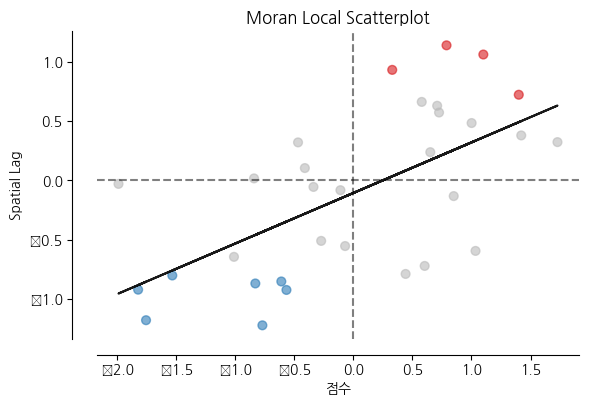

In [ ]:
# 지역 공간 자기상관
moran_local = Moran_Local(y, w)

fig, ax = plt.subplots(figsize=(8,4))
moran_scatterplot(Moran_Local(y, w), p=0.05, ax=ax)
ax.set_xlabel('점수')
ax.set_ylabel('Spatial Lag')

plt.show()

In [ ]:
gdf.head()

,geometry,이름,인자1,인자2,인자3,인자4,인자5,점수,점수(0~100),spatial_lag
0,"MULTIPOLYGON (((127.25464 36.7616, 127.25355 3...",목천읍,-0.428516,0.244970,0.254566,-1.929201,0.116323,-0.164667,42.452270,0.012926
1,"MULTIPOLYGON (((127.13169 36.76247, 127.13145 ...",풍세면,0.097299,0.496733,0.108277,2.572931,0.598264,0.129501,65.404140,-0.296245
2,"MULTIPOLYGON (((127.12771 36.70858, 127.12766 ...",광덕면,1.616034,-0.269363,-0.244159,-0.473698,0.314878,0.333659,81.333179,-0.228999
3,"MULTIPOLYGON (((127.30735 36.85967, 127.30704 ...",북면,1.418237,-0.649956,0.104997,-0.502762,0.328843,0.201572,71.027351,0.059313
4,"MULTIPOLYGON (((127.25464 36.7616, 127.25829 3...",성남면,2.063501,-0.356201,-0.251009,0.870997,0.646503,0.467121,91.746345,0.108216


In [ ]:
gdf['moran_local']=moran_local.q
gdf.moran_local.value_counts()

,count
moran_local,
3,13
1,11
4,4
2,3


* 3: LL (Low-Low)	대상 지점의 값이 낮고, 주변 이웃들도 값이 낮음	저값이 모여 있는 ‘콜드스팟’ (Cold Spot)
* 1: HH (High-High)	대상 지점의 값이 높고, 주변 이웃들도 값이 높음	고값이 모여 있는 ‘핫스팟’ (Hot Spot)
* 2: LH (Low-High)	대상 지점의 값은 낮지만, 주변 이웃들은 값이 높음	저값이 주변 고값들과 인접, 공간적 이질성 (Outlier)
* 4: HL (High-Low)	대상 지점의 값은 높지만, 주변 이웃들은 값이 낮음	고값이 주변 저값들과 인접, 공간적 이질성 (Outlier)

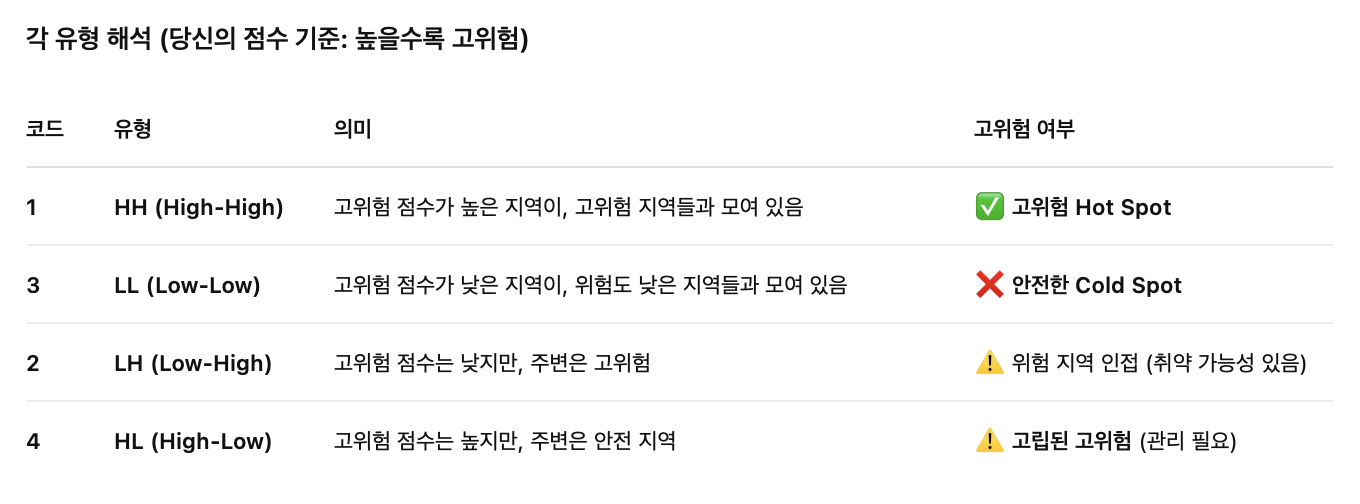

# 공간 자기상관성을 이용한 위험군 필터링

In [ ]:
risk_df = gdf[gdf['moran_local'] == 1]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. moran_local == 1인 행 필터링
risk_df = gdf[gdf['moran_local'] == 1].copy()

# 2. 클러스터링에 사용할 컬럼만 추출
factor_cols = ['인자1', '인자2', '인자3', '인자4', '인자5']
X = risk_df[factor_cols]

# 3. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 데이터프레임화 (인덱스 맞춤)
X_scaled_df = pd.DataFrame(X_scaled, columns=factor_cols, index=risk_df.index)

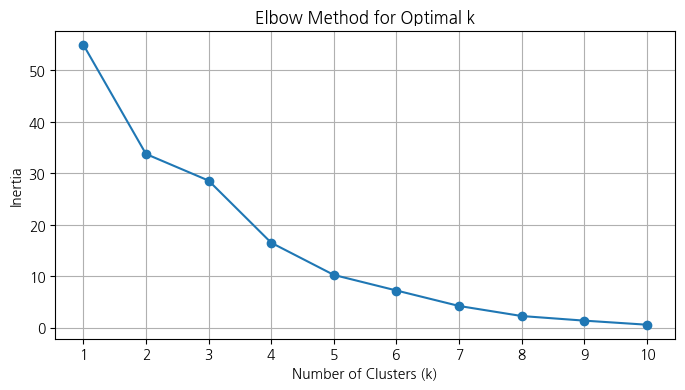

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. 클러스터 수 범위 설정
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# 2. Elbow Plot 시각화
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
# 5. KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
risk_df['cluster'] = kmeans.fit_predict(X_scaled_df)

# 6. 클러스터별 평균 확인
cluster_summary = risk_df.groupby('cluster')[factor_cols + ['점수', '점수(0~100)']].mean()
cluster_summary

,인자1,인자2,인자3,인자4,인자5,점수,점수(0~100)
cluster,,,,,,,
0,1.755929,-0.489304,-0.029140,-0.825806,0.478377,0.279001,77.068600
1,-0.040368,1.115880,-0.766326,0.035378,-0.718829,0.268481,76.247792
2,1.521519,0.069033,-0.088691,0.553548,0.613753,0.391993,85.884624


In [ ]:
# 7. 위험도 매핑 (필요시 cluster_summary 보고 수정)
risk_mapping = {
    2: '고위험',
    0: '중위험',
    1: '저위험'
}
risk_df['위험도'] = risk_df['cluster'].map(risk_mapping)

# 8. gdf에 위험도 및 클러스터 정보 병합 (moran_local==1인 행만 업데이트)
gdf.loc[risk_df.index, 'cluster'] = risk_df['cluster']
gdf.loc[risk_df.index, '위험도'] = risk_df['위험도']

In [ ]:
gdf.head()

,geometry,이름,인자1,인자2,인자3,인자4,인자5,점수,점수(0~100),spatial_lag,moran_local,cluster,위험도
0,"MULTIPOLYGON (((127.25464 36.7616, 127.25355 3...",목천읍,-0.428516,0.244970,0.254566,-1.929201,0.116323,-0.164667,42.452270,0.012926,2,0,None
1,"MULTIPOLYGON (((127.13169 36.76247, 127.13145 ...",풍세면,0.097299,0.496733,0.108277,2.572931,0.598264,0.129501,65.404140,-0.296245,4,1,None
2,"MULTIPOLYGON (((127.12771 36.70858, 127.12766 ...",광덕면,1.616034,-0.269363,-0.244159,-0.473698,0.314878,0.333659,81.333179,-0.228999,4,2,None
3,"MULTIPOLYGON (((127.30735 36.85967, 127.30704 ...",북면,1.418237,-0.649956,0.104997,-0.502762,0.328843,0.201572,71.027351,0.059313,1,0,중위험
4,"MULTIPOLYGON (((127.25464 36.7616, 127.25829 3...",성남면,2.063501,-0.356201,-0.251009,0.870997,0.646503,0.467121,91.746345,0.108216,1,2,고위험


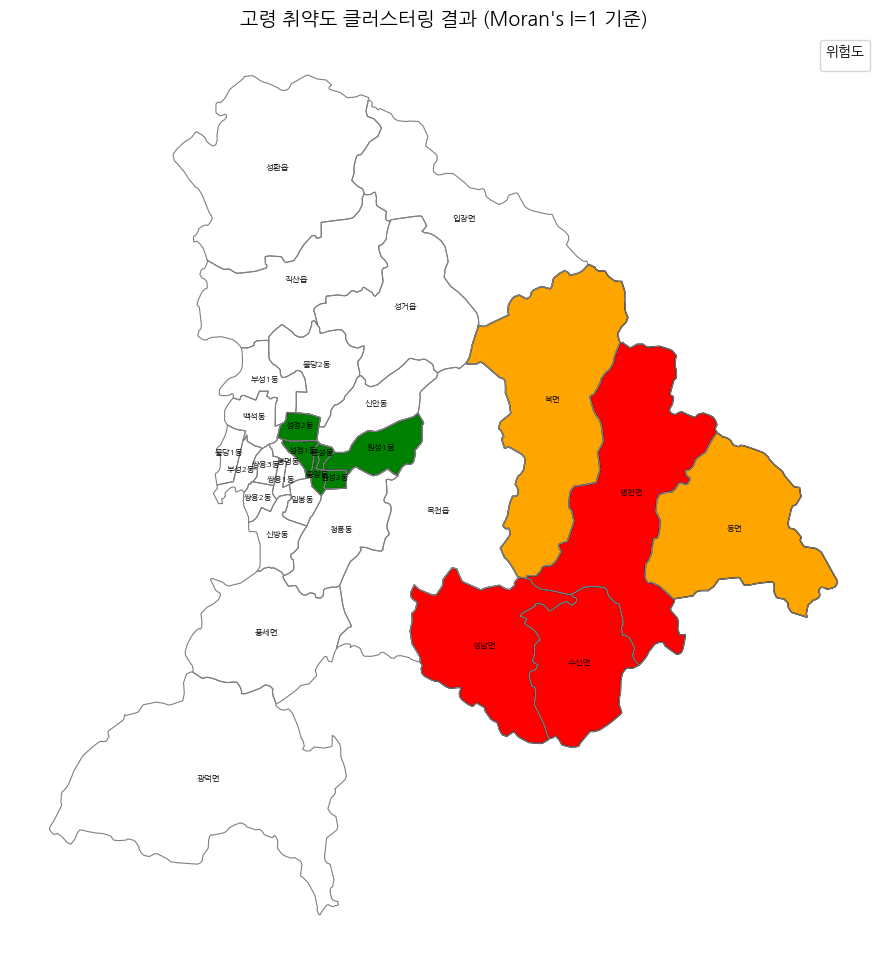

In [ ]:
# 9. 시각화 준비
color_dict = {
    '고위험': 'red',
    '중위험': 'orange',
    '저위험': 'green'
}

fig, ax = plt.subplots(figsize=(12, 12))

# 전체 행정동 테두리 회색으로 그림
gdf.boundary.plot(ax=ax, linewidth=0.8, edgecolor='gray')

# 행정동 이름 표시
for idx, row in gdf.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(x, y, row['이름'], fontsize=6, ha='center', color='black')

# moran_local == 1인 지역 중 위험도별 색칠
for risk_level, color in color_dict.items():
    subset = gdf[(gdf['moran_local'] == 1) & (gdf['위험도'] == risk_level)]
    subset.plot(ax=ax, color=color, edgecolor='black', linewidth=1, label=risk_level)

plt.legend(title="위험도", loc='upper right')
plt.title("고령 취약도 클러스터링 결과 (Moran's I=1 기준)", fontsize=14)
plt.axis('off')
plt.show()

✅ 왜 점수 차이가 크게 나지 않는 것이 이상하지 않은가?

1.	위험군 자체가 동질적인 집단

	•	애초에 가중점수나 특정 인자 기준으로 “위험군”을 필터링했기 때문에, 이 군집 내에서는 점수가 상향 평준화된 상태입니다.

	•	따라서 이 안에서 클러스터링을 해도 점수 차이는 크지 않지만, 구조나 패턴은 다를 수 있습니다.

2.	군집화 목적이 ‘구분’이 아니라 ‘세분화’

	•	클러스터링의 목적이 고위험군 내의 세부 유형을 파악하는 것이기 때문에, 점수보다는 어떤 인자가 두드러지게 작용하는지가 더 중요합니다.

	•	예: 어떤 군집은 인자1(인프라 부족), 어떤 군집은 인자2(의료 접근성 낮음) 등.

3.	점수 차이보다 ‘인자 조합 차이’가 포인트

	•	점수 평균이 비슷하더라도, 각 군집별로 어떤 인자에 의해 점수가 구성되었는지가 다르다면 정책적 접근이 달라집니다.

	•	예: A와 B 둘 다 76점이지만, A는 ‘인지건강’이 약하고 B는 ‘생활 인프라’가 약한 식으로.

⸻

🔍 그래서 어떻게 해석해야 하나요?

•	클러스터별 평균 인자값을 보고 해석

→ 어떤 인자가 두드러지는지 파악해서 유형화 (예: “인지 취약형”, “생활 취약형” 등)

•	시각화 활용

→ 레이더 차트, 바 차트 등으로 각 군집의 인자 패턴을 시각화하면 더 뚜렷하게 보입니다.

⸻

📝 결론

고위험군 내 세분화를 위한 클러스터링에서는 점수 차이가 크게 나지 않는 게 오히려 타당합니다.
이제는 ‘왜 비슷한 점수 안에서도 다르게 군집화되었는지’를 설명하는 작업이 필요합니다.

In [ ]:
# 고위험 사각지대
gdf[gdf['cluster']==2]['이름']

,이름
2,광덕면
4,성남면
5,수신면
6,병천면
17,성환읍
20,입장면
25,쌍용3동


In [ ]:
# 중위험 사각지대
gdf[gdf['cluster']==0]['이름']

,이름
0,목천읍
3,북면
7,동면
12,봉명동
14,신방동
18,성거읍
19,직산읍
23,쌍용1동


In [ ]:
# 저위험 사각지대
gdf[gdf['cluster']==1]['이름']

,이름
1,풍세면
8,중앙동
9,문성동
10,원성1동
11,원성2동
13,일봉동
15,청룡동
16,신안동
21,성정1동
22,성정2동


cluster에는 위험군이 아닌 행정동도 포함!

cluster에 있는 행정동간의 특성 파악을 하고

-> cluster 중 위험군에 속하는('moran_local' == 1 [HH]) 곳의 특성과 위험군인 이유 유추..?

# 이건 그냥 지피티한테 부탁한 클러스터 해석

주어진 정보를 바탕으로 클러스터 0, 1, 2의 특성을 해석하면 아래와 같습니다:

⸻

✅ 인자별 의미 정리

•	인자 1: 고령화 및 독거노인 특성

•	인자 2: 경제활동 및 소비여력

•	인자 3: 인지건강 서비스 지원

•	인자 4: 금융취약도 및 부채부담

•	인자 5: 취약 노인 생활 인프라

⸻

📊 클러스터별 평균값 요약

Cluster|인자1|인자2|인자3|인자4|인자5|점수(0~100)
-|-|-|-|-|-|-
0|1.76|-0.49|-0.03|-0.83|0.48|77.07
1|-0.04|1.12|-0.77|0.04|-0.72|76.25
2|1.52|0.07|-0.09|0.55|0.61|85.88


⸻

🔍 클러스터 해석

📌 클러스터 2 (점수 85.88) → 고위험군

•	인자1(고령화 및 독거노인): 매우 높음 → 고령 및 독거 비율 높음

•	인자4(금융취약도): 매우 높음 → 대출잔액 크고 금융 취약

•	인자5(생활 인프라 부족): 높음 → 재가복지, 급식소, 일자리 등 부족

→ 전반적으로 사회적·경제적으로 매우 취약한 노인 집단

📌 클러스터 0 (점수 77.07) → 중위험군

•	인자1: 매우 높음 → 고령·독거노인 비중 높음

•	인자4: 낮음 → 상대적으로 금융적 부담 적음

•	인자5: 다소 높음 → 생활 인프라 일부 부족

•	인자2: 낮음 → 소비·소득 여력 부족

→ 노인 비중은 높으나, 금융·건강 리스크는 약간 덜한 중위험군

📌 클러스터 1 (점수 76.25) → 저위험군 또는 잠재 위험군

•	인자2: 매우 높음 → 소득, 소비 여력 높음

•	인자3: 매우 낮음 → 인지건강 관련 인프라 부족

•	인자5: 낮음 → 생활 인프라 부족

•	인자1: 거의 평균 → 고령화는 상대적으로 적당

→ 경제적 여력은 있으나 인지건강·복지시설 부족으로 위험 가능성 존재

⸻

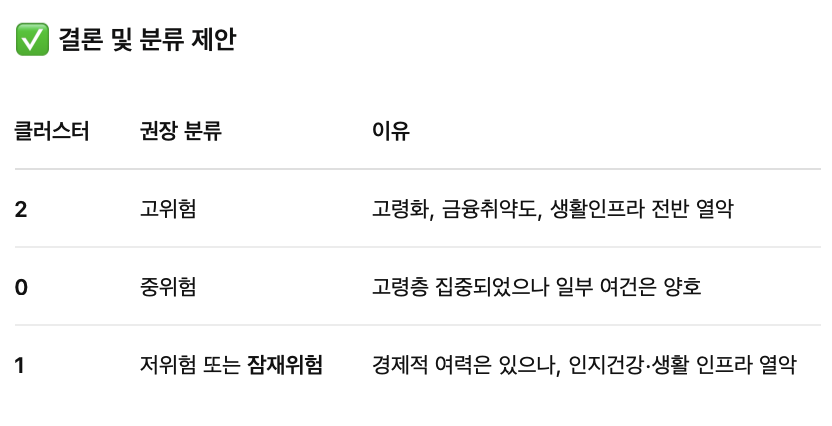


⸻

💡 제안

•	클러스터 1은 “저위험”이라기보다는 **“비재정적 위험(인지건강/서비스 부족)”**이 커서 잠재 위험군으로 분류하는 것이 타당해 보입니다.

•	점수 차이는 작더라도 인자 프로파일의 방향성이 다르기 때문에, 단순 평균 점수보다 요인별 특성과 조합에 따라 해석하는 것이 중요합니다.